<a href="https://colab.research.google.com/github/K1ngHungry/DataScienceClub/blob/main/Baseball%20Case%20Study/Data_Preparation_EDA_Reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
if(!require('pacman')) {install.packages('pacman')} #if else statement
pacman::p_load(ISLR, readxl, tidyverse, magrittr, dplyr, ggplot2, ggrepel)

Loading required package: pacman

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pacman’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


ISLR installed

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’



ggrepel installed



In [ ]:
data <- read.csv('https://raw.githubusercontent.com/K1ngHungry/DataScienceClub/main/Baseball%20Case%20Study/MLPayData_Total.csv')

In [ ]:
data[1:4,] #1:4 for rows, keep all columns
#below each column is the data type of each variable

,Team.name.2014,p1998,p1999,p2000,p2001,p2002,p2003,p2004,p2005,p2006,⋯,X2007.pct,X2006.pct,X2005.pct,X2004.pct,X2003.pct,X2002.pct,X2001.pct,X2000.pct,X1999.pct,X1998.pct
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona Diamondbacks,31.61450,70.49600,81.02783,81.20651,102.82000,80.64033,70.20498,63.01583,59.68423,⋯,0.5555556,0.4691358,0.4753086,0.3148148,0.5185185,0.6049383,0.5679012,0.5246914,0.6172840,0.4012346
2,Atlanta Braves,61.70800,74.89000,84.53784,91.85169,93.47037,106.24367,88.50779,85.14858,90.15688,⋯,0.5185185,0.4876543,0.5555556,0.5925926,0.6234568,0.6312500,0.5432099,0.5864198,0.6358025,0.6543210
3,Baltimore Orioles,71.86092,72.19836,81.44743,72.42633,60.49349,73.87750,51.21265,74.57054,72.58558,⋯,0.4259259,0.4320988,0.4567901,0.4814815,0.4382716,0.4135802,0.3913043,0.4567901,0.4814815,0.4876543
4,Boston Red Sox,59.49700,71.72500,77.94033,109.55891,108.36606,99.94650,125.20854,121.31194,120.09982,⋯,0.5925926,0.5308642,0.5864198,0.6049383,0.5864198,0.5740741,0.5093168,0.5246914,0.5802469,0.5679012


In [ ]:
str(data, list.len = 4)

'data.frame':	30 obs. of  52 variables:
 $ Team.name.2014: chr  "Arizona Diamondbacks" "Atlanta Braves" "Baltimore Orioles" "Boston Red Sox" ...
 $ p1998         : num  31.6 61.7 71.9 59.5 49.8 ...
 $ p1999         : num  70.5 74.9 72.2 71.7 42.1 ...
 $ p2000         : num  81 84.5 81.4 77.9 60.5 ...
  [list output truncated]


In [ ]:
summary(data)

 Team.name.2014         p1998            p1999           p2000      
 Length:30          Min.   : 8.317   Min.   :15.15   Min.   :16.52  
 Class :character   1st Qu.:27.683   1st Qu.:31.67   1st Qu.:38.94  
 Mode  :character   Median :43.895   Median :46.07   Median :56.54  
                    Mean   :41.080   Mean   :48.19   Mean   :55.66  
                    3rd Qu.:57.262   3rd Qu.:70.96   3rd Qu.:74.61  
                    Max.   :71.861   Max.   :88.18   Max.   :92.54  
     p2001            p2002            p2003            p2004       
 Min.   : 24.35   Min.   : 34.38   Min.   : 19.63   Min.   : 27.52  
 1st Qu.: 43.62   1st Qu.: 45.60   1st Qu.: 50.45   1st Qu.: 46.67  
 Median : 62.85   Median : 61.11   Median : 68.98   Median : 62.21  
 Mean   : 64.46   Mean   : 67.45   Mean   : 71.03   Mean   : 68.55  
 3rd Qu.: 80.22   3rd Qu.: 79.94   3rd Qu.: 83.33   3rd Qu.: 86.89  
 Max.   :109.79   Max.   :125.93   Max.   :152.75   Max.   :182.84  
     p2005            p2006       

In [ ]:
names(data) #variable names are under the columns

[1] "Team.name.2014" "p1998"          "p1999"          "p2000"         
 [5] "p2001"          "p2002"          "p2003"          "p2004"         
 [9] "p2005"          "p2006"          "p2007"          "p2008"         
[13] "p2009"          "p2010"          "p2011"          "p2012"         
[17] "p2013"          "p2014"          "X2014"          "X2013"         
[21] "X2012"          "X2011"          "X2010"          "X2009"         
[25] "X2008"          "X2007"          "X2006"          "X2005"         
[29] "X2004"          "X2003"          "X2002"          "X2001"         
[33] "X2000"          "X1999"          "X1998"          "X2014.pct"     
[37] "X2013.pct"      "X2012.pct"      "X2011.pct"      "X2010.pct"     
[41] "X2009.pct"      "X2008.pct"      "X2007.pct"      "X2006.pct"     
[45] "X2005.pct"      "X2004.pct"      "X2003.pct"      "X2002.pct"     
[49] "X2001.pct"      "X2000.pct"      "X1999.pct"      "X1998.pct"

In [ ]:
data <- data %>% rename(team = Team.name.2014) #piping
data[1:4, ]

,team,p1998,p1999,p2000,p2001,p2002,p2003,p2004,p2005,p2006,⋯,X2007.pct,X2006.pct,X2005.pct,X2004.pct,X2003.pct,X2002.pct,X2001.pct,X2000.pct,X1999.pct,X1998.pct
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona Diamondbacks,31.61450,70.49600,81.02783,81.20651,102.82000,80.64033,70.20498,63.01583,59.68423,⋯,0.5555556,0.4691358,0.4753086,0.3148148,0.5185185,0.6049383,0.5679012,0.5246914,0.6172840,0.4012346
2,Atlanta Braves,61.70800,74.89000,84.53784,91.85169,93.47037,106.24367,88.50779,85.14858,90.15688,⋯,0.5185185,0.4876543,0.5555556,0.5925926,0.6234568,0.6312500,0.5432099,0.5864198,0.6358025,0.6543210
3,Baltimore Orioles,71.86092,72.19836,81.44743,72.42633,60.49349,73.87750,51.21265,74.57054,72.58558,⋯,0.4259259,0.4320988,0.4567901,0.4814815,0.4382716,0.4135802,0.3913043,0.4567901,0.4814815,0.4876543
4,Boston Red Sox,59.49700,71.72500,77.94033,109.55891,108.36606,99.94650,125.20854,121.31194,120.09982,⋯,0.5925926,0.5308642,0.5864198,0.6049383,0.5864198,0.5740741,0.5093168,0.5246914,0.5802469,0.5679012


In [ ]:
names(data)

[1] "team"      "p1998"     "p1999"     "p2000"     "p2001"     "p2002"    
 [7] "p2003"     "p2004"     "p2005"     "p2006"     "p2007"     "p2008"    
[13] "p2009"     "p2010"     "p2011"     "p2012"     "p2013"     "p2014"    
[19] "X2014"     "X2013"     "X2012"     "X2011"     "X2010"     "X2009"    
[25] "X2008"     "X2007"     "X2006"     "X2005"     "X2004"     "X2003"    
[31] "X2002"     "X2001"     "X2000"     "X1999"     "X1998"     "X2014.pct"
[37] "X2013.pct" "X2012.pct" "X2011.pct" "X2010.pct" "X2009.pct" "X2008.pct"
[43] "X2007.pct" "X2006.pct" "X2005.pct" "X2004.pct" "X2003.pct" "X2002.pct"
[49] "X2001.pct" "X2000.pct" "X1999.pct" "X1998.pct"

**START OF WEEK 3**


In [ ]:
#pivot_longer is a function that reformats data so there are less columns and more rows

payroll <- data %>%   # first create variable: payroll and year
  select(team, p1998:p2014) %>% 
  pivot_longer(cols = starts_with("p"), 
               names_to = "year", 
               names_prefix = "p",
               values_to = "payroll")
payroll[1:3, 1:3] # show a few rows

win_num <- data %>%  # create variable: win_num and year
  select(team, X1998:X2014) %>% 
  pivot_longer(cols = X1998:X2014,
               names_to = "year", 
               names_prefix = "X",
               values_to = "win_num")
#win_num[1:3, 1:3]

win_pct <- data %>%  # create variable: win_pct and year
  select(team, X1998.pct:X2014.pct) %>% 
  pivot_longer(cols = X1998.pct:X2014.pct,
               names_to = "year",
               names_prefix = "X", 
               values_to = "win_pct") %>%
  mutate(year = substr(year, 1, 4))
#win_pct[1:3, 1:3]

# join tables into team, year, payrow, win_num, win_pct
data2 <- payroll %>% 
  inner_join(win_num, by = c("team", "year")) %>%
  inner_join(win_pct, by = c("team", "year")) 
head(data2, 2)  # see first 2 rows

team,year,payroll
<chr>,<chr>,<dbl>
Arizona Diamondbacks,1998,31.61450
Arizona Diamondbacks,1999,70.49600
Arizona Diamondbacks,2000,81.02783


team,year,payroll,win_num,win_pct
<chr>,<chr>,<dbl>,<int>,<dbl>
Arizona Diamondbacks,1998,31.6145,65,0.4012346
Arizona Diamondbacks,1999,70.4960,100,0.6172840


In [ ]:
names(data2) #new variable names

[1] "team"    "year"    "payroll" "win_num" "win_pct"

In [ ]:
write.csv(data2, "baseball.csv", row.names = F)

In [ ]:
baseball <- read.csv('/content/baseball.csv')
names(baseball)

[1] "team"    "year"    "payroll" "win_num" "win_pct"

In [ ]:
data3 <- baseball %>% #baseball is piped into the next function
  group_by(team) %>% #grouping by team
  summarise(
    payroll_total = sum(payroll)/1000, #for each team, we create a new var called payroll_total and it is the sum of payrolls, converted from millions to billions
    win_pct_avg = mean(win_pct)) #similarly, win_pct_avg is the mean of win_pct for each team
str(data3)
summary(data3)

tibble [30 × 3] (S3: tbl_df/tbl/data.frame)
 $ team         : chr [1:30] "Arizona Diamondbacks" "Atlanta Braves" "Baltimore Orioles" "Boston Red Sox" ...
 $ payroll_total: num [1:30] 1.22 1.52 1.31 2.1 1.55 ...
 $ win_pct_avg  : num [1:30] 0.492 0.563 0.459 0.553 0.476 ...


     team           payroll_total     win_pct_avg    
 Length:30          Min.   :0.6981   Min.   :0.4335  
 Class :character   1st Qu.:1.0215   1st Qu.:0.4735  
 Mode  :character   Median :1.2641   Median :0.4923  
                    Mean   :1.3277   Mean   :0.5000  
                    3rd Qu.:1.5166   3rd Qu.:0.5263  
                    Max.   :2.8571   Max.   :0.5938  

In [ ]:
data3

team,payroll_total,win_pct_avg
<chr>,<dbl>,<dbl>
Arizona Diamondbacks,1.2229841,0.4920116
Atlanta Braves,1.5183098,0.5632761
Baltimore Orioles,1.3052710,0.4592642
Boston Red Sox,2.1035807,0.5528356
Chicago Cubs,1.5517256,0.4758772
Chicago White Sox,1.3751059,0.5083224
Cincinnati Reds,1.1187674,0.4925240
Cleveland Indians,1.1131666,0.5068991
Colorado Rockies,1.1293117,0.4638518


In [ ]:
print("Mean")
mean(data3$payroll_total)
print("SD")
sd(data3$payroll_total) 
print("Quantile")
quantile(data3$payroll_total, prob = seq(0, 1, 0.25))
print("Median")
median(data3$payroll_total)
print("Max")
max(data3$payroll_total)
print("Min")
min(data3$payroll_total)

[1] "Mean"


[1] 1.327714

[1] "SD"


[1] 0.4501229

[1] "Quantile"


0%       25%       50%       75%      100% 
0.6980929 1.0215046 1.2641276 1.5165702 2.8570926

[1] "Median"


[1] 1.264128

[1] "Max"


[1] 2.857093

[1] "Min"


[1] 0.6980929

In [ ]:
data3$team[which.max(data3$payroll_total)] 
data3$team[which.min(data3$payroll_total)]

[1] "New York Yankees"

[1] "Miami Marlins"

In [ ]:
#To rank teams by payroll in decreasing order
arrange(data3, desc(payroll_total))[1:6,] #default decs=T

team,payroll_total,win_pct_avg
<chr>,<dbl>,<dbl>
New York Yankees,2.857093,0.5938154
Boston Red Sox,2.103581,0.5528356
Los Angeles Dodgers,1.874194,0.5288705
New York Mets,1.718596,0.5022806
Philadelphia Phillies,1.689312,0.5186989
Los Angeles Angels,1.660880,0.5395788


In [ ]:
#this uses the dplyr library, the arrange() function works too
data3 %>% select(team,payroll_total) %>% filter(payroll_total == max(payroll_total))
data3 %>% select(team,payroll_total) %>% filter(payroll_total == min(payroll_total))

team,payroll_total
<chr>,<dbl>
New York Yankees,2.857093


team,payroll_total
<chr>,<dbl>
Miami Marlins,0.6980929


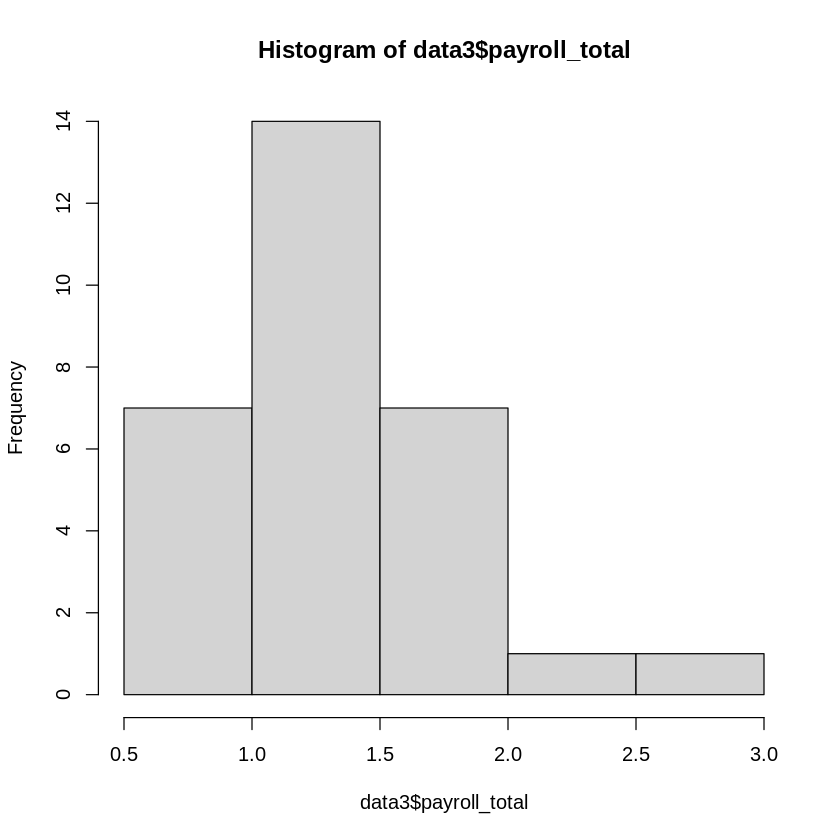

In [ ]:
hist(data3$payroll_total, breaks=5)

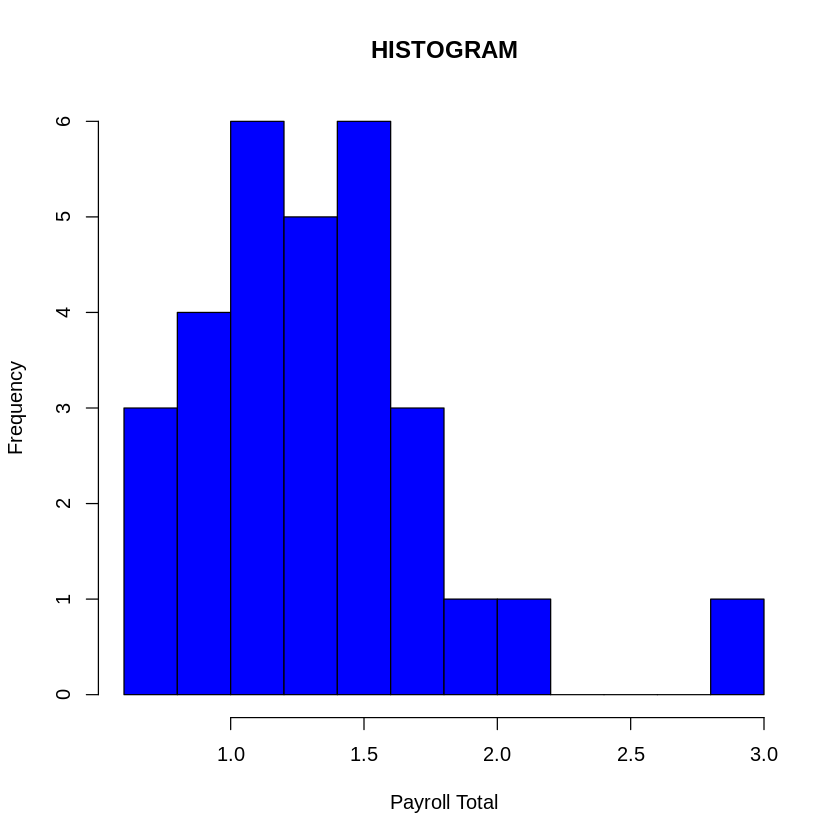

In [ ]:
hist(data3$payroll_total, breaks=10, main = "HISTOGRAM", xlab = "Payroll Total", col = "blue")

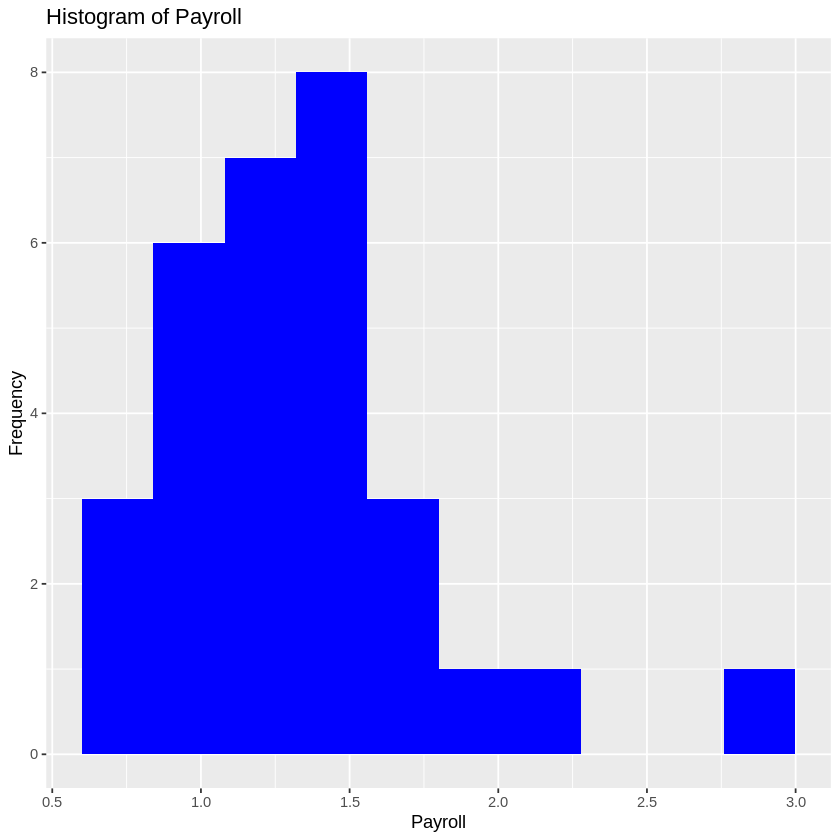

In [ ]:
p1 <- ggplot(data3) + 
  geom_histogram(aes(x = payroll_total), bins = 10, fill = "blue") +
  labs( title = "Histogram of Payroll", x = "Payroll" , y = "Frequency")
p1

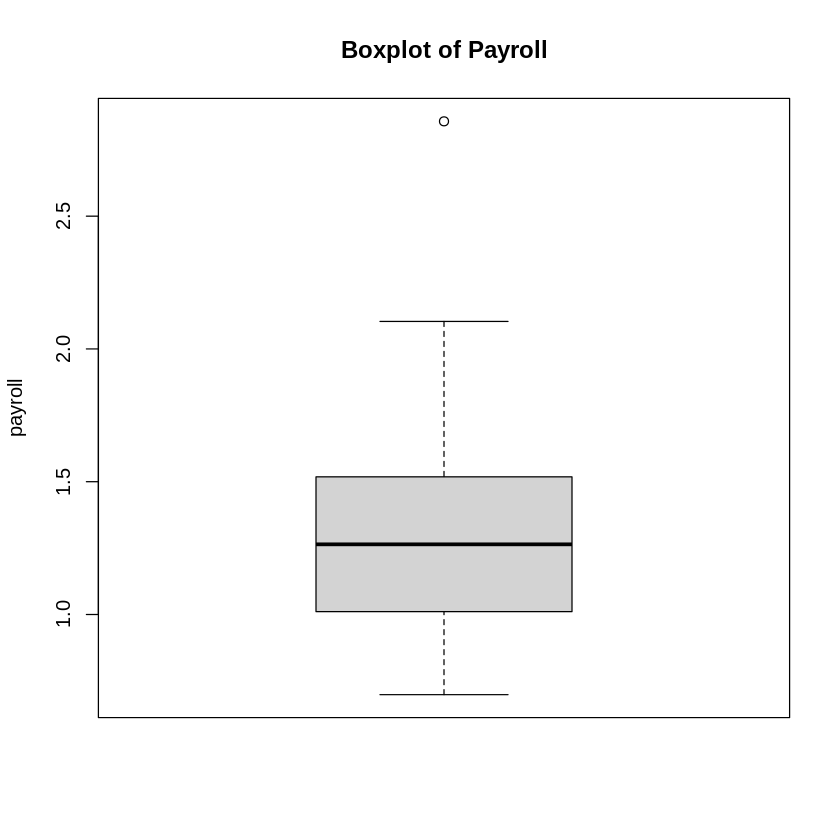

In [ ]:
boxplot(data3$payroll_total,
        main = "Boxplot of Payroll",
        ylab = "payroll")

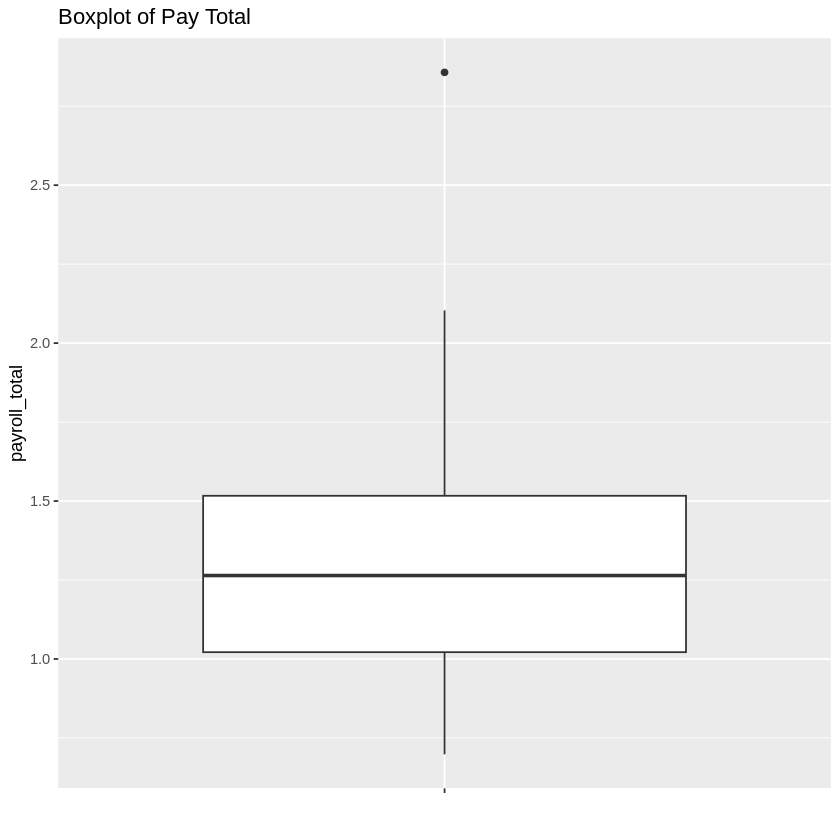

In [ ]:
ggplot(data3) + 
  geom_boxplot(aes(x="", y=payroll_total)) + 
  labs(title="Boxplot of Pay Total", x="") 

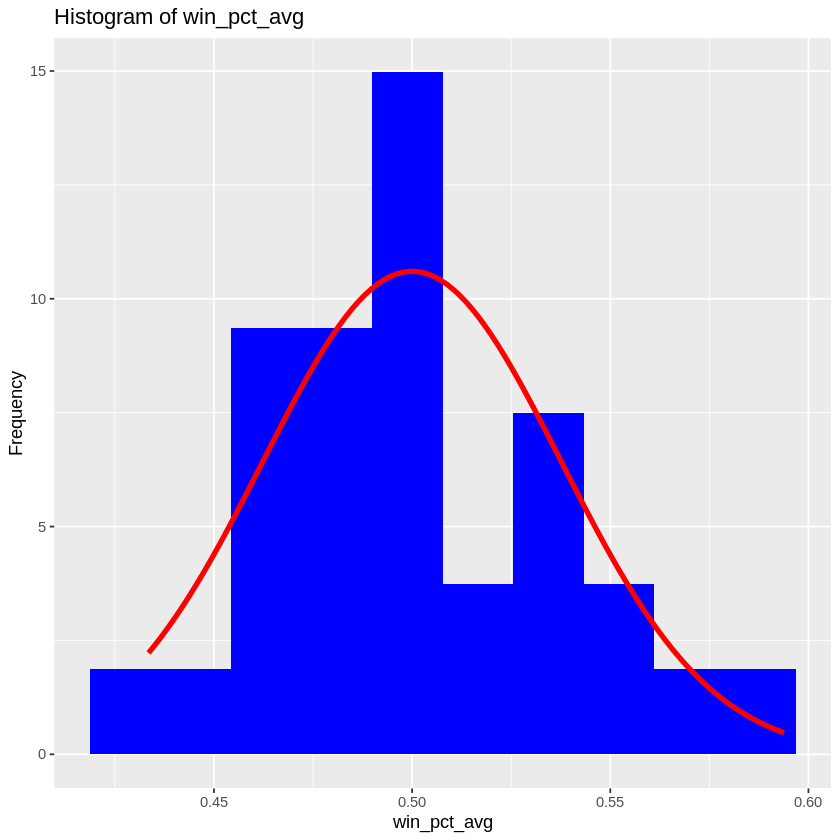

In [ ]:
ggplot(data3) +
  geom_histogram(aes(x=win_pct_avg, y = ..density..), bins=10, fill= "blue" ) +
  stat_function(fun = dnorm, args = list(mean = mean(data3$win_pct_avg), 
                                         sd = sd(data3$win_pct_avg)), colour = "red", size = 1.5)+
  labs( title = "Histogram of win_pct_avg", x = "win_pct_avg" , y = "Frequency") 

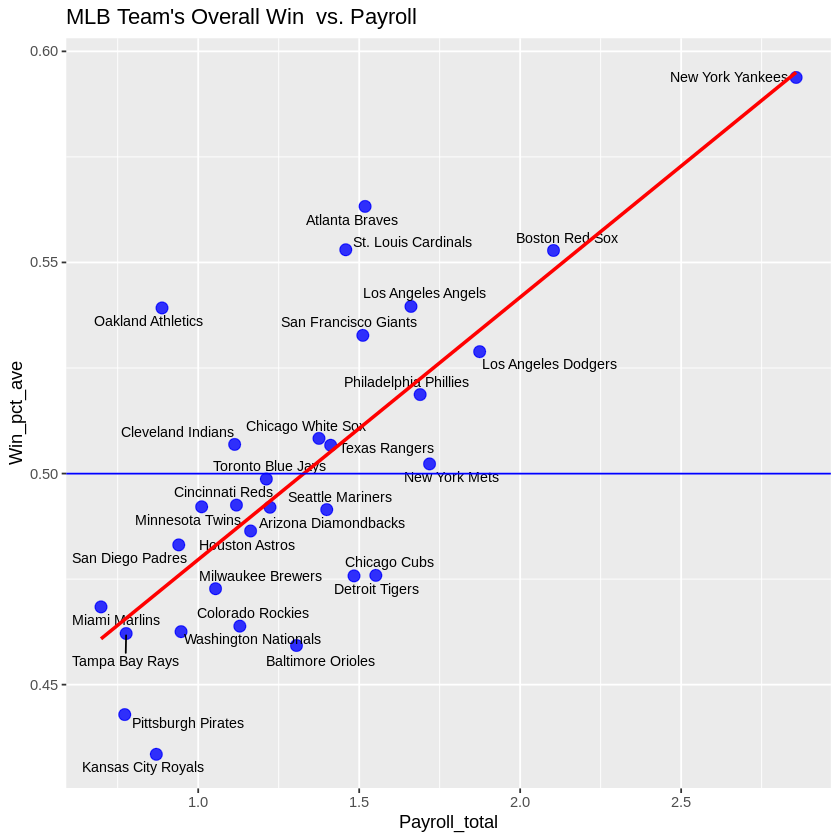

In [ ]:
data3 %>%
  ggplot(aes(x = payroll_total, y = win_pct_avg)) + 
  # geometric options: color, size, shape, alpha: transparency (range: 0 to 1)
  geom_point(color = "blue", size= 3, alpha = .8) + 
  geom_text_repel(aes(label = team), size = 3) +
  labs(title = "MLB Team's Overall Win  vs. Payroll", 
       x = "Payroll_total", 
       y = "Win_pct_ave") #+

  #graph line of best fit 
  #geom_smooth(method = "lm", formula = y ~ x, se = F,color = "red") + 
  #geom_hline(aes(yintercept = mean(win_pct_avg)), color = "blue")

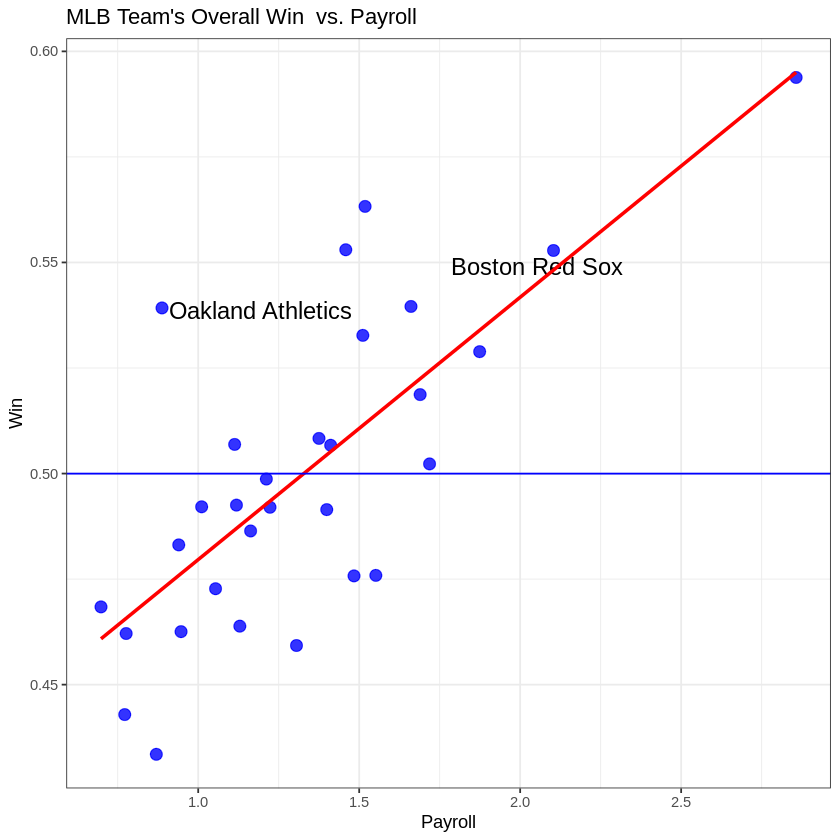

In [59]:
selected_teams <- c("Oakland Athletics", "Boston Red Sox")

data3 %>%
  ggplot(aes(x = payroll_total, y = win_pct_avg)) + 
  geom_point(color = "blue", size= 3, alpha = .8) + 
  # only show names of selected_teams
  geom_text_repel(data = subset(data3, team %in% selected_teams),
                  aes(label = team), size = 5) +
  geom_smooth(method = "lm", formula = y ~ x, se = F,color = "red") + 
  geom_hline(aes(yintercept = mean(win_pct_avg)), color = "blue") +
  labs(title = "MLB Team's Overall Win  vs. Payroll", 
       x = "Payroll", 
       y = "Win") +
  theme_bw() +
  theme(legend.position = "none")